# Machine Learning Group Challenge 01
## By Sunda Empire - IF4107

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Exploration/Understanding

In [6]:
df_train = pd.read_csv("train.csv")
df_train

,Att1,Att2,Att3,Att4,Att5,Att6,Class
0,3.9,Besar,Hijau,48,81.0,3,A
1,NaN,Besar,Merah,36,63.0,3,A
2,7.7,Kecil,Merah,12,20.0,3,C
3,10.9,Besar,Biru,12,16.0,2,C
4,5.7,Kecil,Hijau,24,42.0,3,B
5,4.7,Besar,Hijau,36,62.0,3,B
6,8.2,Kecil,Biru,24,NaN,2,C
7,4.4,Sedang,Merah,36,74.0,3,A
8,8.2,Sedang,Biru,12,32.0,2,C
9,5.8,Besar,Biru,24,52.0,3,B


In [7]:
#handle missing value with mean imputation
df_train.fillna(df_train.mean(), inplace=True)
df_train

,Att1,Att2,Att3,Att4,Att5,Att6,Class
0,3.9,Besar,Hijau,48,81.0,3,A
1,6.2,Besar,Merah,36,63.0,3,A
2,7.7,Kecil,Merah,12,20.0,3,C
3,10.9,Besar,Biru,12,16.0,2,C
4,5.7,Kecil,Hijau,24,42.0,3,B
5,4.7,Besar,Hijau,36,62.0,3,B
6,8.2,Kecil,Biru,24,51.9,2,C
7,4.4,Sedang,Merah,36,74.0,3,A
8,8.2,Sedang,Biru,12,32.0,2,C
9,5.8,Besar,Biru,24,52.0,3,B


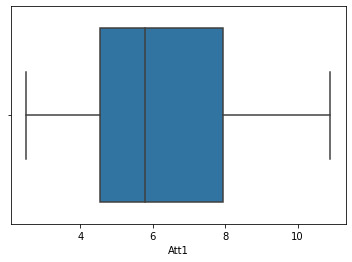

In [8]:
#detect outliers using boxplot

sns.boxplot(df_train['Att1'])

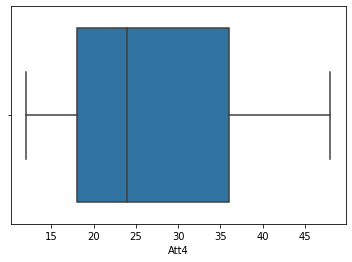

In [9]:
sns.boxplot(df_train['Att4'])

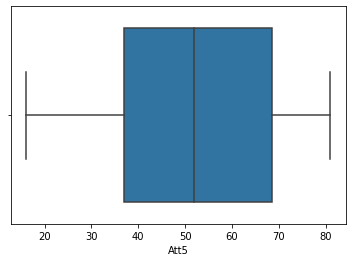

In [10]:
sns.boxplot(df_train['Att5'])

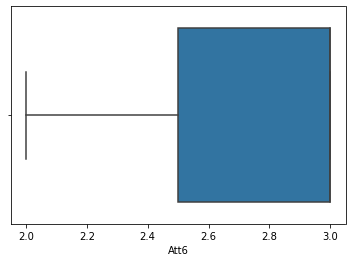

In [11]:
sns.boxplot(df_train['Att6'])

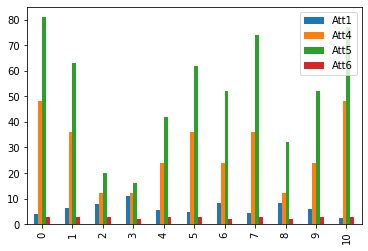

In [12]:
#plot histogram to show data distribution, check for suspicious plots
df_train.plot(kind='bar')
plt.show()

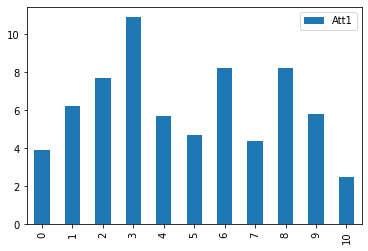

In [13]:
#Att1
dfatt1 = pd.DataFrame(df_train, columns= ["Att1"])
dfatt1.plot(kind='bar')
plt.show()

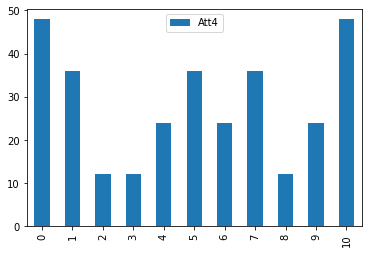

In [14]:
#Att4
dfatt4 = pd.DataFrame(df_train, columns= ["Att4"])
dfatt4.plot(kind='bar')
plt.show()

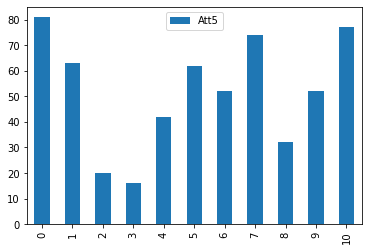

In [15]:
#Att5
dfatt5 = pd.DataFrame(df_train, columns= ["Att5"])
dfatt5.plot(kind='bar')
plt.show()

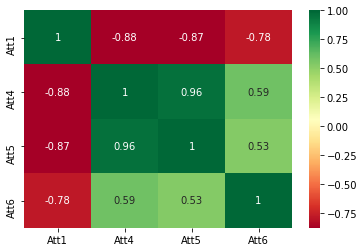

In [19]:
#Correlation Matrix with Heat Map

corrmat = df_train.corr()
top_corr_features = corrmat.index
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### 2. Feature Engineering

In [21]:
df_test = pd.read_csv("test.csv")
df_dataset = pd.concat([df_train, df_test], axis=0)
df_dataset

,Att1,Att2,Att3,Att4,Att5,Att6,Class
0,3.9,Besar,Hijau,48,81.0,3,A
1,6.2,Besar,Merah,36,63.0,3,A
2,7.7,Kecil,Merah,12,20.0,3,C
3,10.9,Besar,Biru,12,16.0,2,C
4,5.7,Kecil,Hijau,24,42.0,3,B
5,4.7,Besar,Hijau,36,62.0,3,B
6,8.2,Kecil,Biru,24,51.9,2,C
7,4.4,Sedang,Merah,36,74.0,3,A
8,8.2,Sedang,Biru,12,32.0,2,C
9,5.8,Besar,Biru,24,52.0,3,B


In [22]:
#encode ordinal categorical data
df_dataset.Att2 = pd.Categorical(df_dataset.Att2,['Kecil','Sedang','Besar'], ordered=True)
df_dataset.Att2 = df_dataset.Att2.cat.codes
df_dataset

,Att1,Att2,Att3,Att4,Att5,Att6,Class
0,3.9,2,Hijau,48,81.0,3,A
1,6.2,2,Merah,36,63.0,3,A
2,7.7,0,Merah,12,20.0,3,C
3,10.9,2,Biru,12,16.0,2,C
4,5.7,0,Hijau,24,42.0,3,B
5,4.7,2,Hijau,36,62.0,3,B
6,8.2,0,Biru,24,51.9,2,C
7,4.4,1,Merah,36,74.0,3,A
8,8.2,1,Biru,12,32.0,2,C
9,5.8,2,Biru,24,52.0,3,B


In [24]:
#encode non-ordinal categorical data

Att3 = df_dataset['Att3']
Att3_ohe = pd.get_dummies(data=Att3)
obj_columns = list(df_dataset.select_dtypes(include=['object']).columns)
obj_columns.remove('Class')
data_encoded = pd.get_dummies(data=df_dataset, columns=obj_columns)
data_encoded

,Att1,Att2,Att4,Att5,Att6,Class,Att3_Biru,Att3_Hijau,Att3_Merah
0,3.9,2,48,81.0,3,A,0,1,0
1,6.2,2,36,63.0,3,A,0,0,1
2,7.7,0,12,20.0,3,C,0,0,1
3,10.9,2,12,16.0,2,C,1,0,0
4,5.7,0,24,42.0,3,B,0,1,0
5,4.7,2,36,62.0,3,B,0,1,0
6,8.2,0,24,51.9,2,C,1,0,0
7,4.4,1,36,74.0,3,A,0,0,1
8,8.2,1,12,32.0,2,C,1,0,0
9,5.8,2,24,52.0,3,B,1,0,0


In [25]:
#Scalling Min-Max Train
sc = MinMaxScaler()
data_encoded.iloc[0:10,[0,1,2,3,4,6,7,8]] = sc.fit_transform(data_encoded.iloc[0:10,[0,1,2,3,4,6,7,8]])

#Scalling Min-Max Test
sc = MinMaxScaler()
data_encoded.iloc[11:16,[0,1,2,3,4,6,7,8]] = sc.fit_transform(data_encoded.iloc[11:16,[0,1,2,3,4,6,7,8]])

data_encoded

,Att1,Att2,Att4,Att5,Att6,Class,Att3_Biru,Att3_Hijau,Att3_Merah
0,0.000000,1.0,1.000000,1.000000,1.0,A,0.0,1.0,0.0
1,0.328571,1.0,0.666667,0.723077,1.0,A,0.0,0.0,1.0
2,0.542857,0.0,0.000000,0.061538,1.0,C,0.0,0.0,1.0
3,1.000000,1.0,0.000000,0.000000,0.0,C,1.0,0.0,0.0
4,0.257143,0.0,0.333333,0.400000,1.0,B,0.0,1.0,0.0
5,0.114286,1.0,0.666667,0.707692,1.0,B,0.0,1.0,0.0
6,0.614286,0.0,0.333333,0.552308,0.0,C,1.0,0.0,0.0
7,0.071429,0.5,0.666667,0.892308,1.0,A,0.0,0.0,1.0
8,0.614286,0.5,0.000000,0.246154,0.0,C,1.0,0.0,0.0
9,0.271429,1.0,0.333333,0.553846,1.0,B,1.0,0.0,0.0


### 3. Output

In [26]:
#data Splitting : split dataset into data train, validation, and data test
x = data_encoded.loc[:, data_encoded.columns != "Class"] 
y = data_encoded["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=11, shuffle=False)
x_train_2, y_train_2 = x_train, y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=7, shuffle=False)
print("Feature Train\n",x_train)
print("\nClass Train\n",y_train)

Feature Train
        Att1  Att2      Att4      Att5  Att6  Att3_Biru  Att3_Hijau  Att3_Merah
0  0.000000   1.0  1.000000  1.000000   1.0        0.0         1.0         0.0
1  0.328571   1.0  0.666667  0.723077   1.0        0.0         0.0         1.0
2  0.542857   0.0  0.000000  0.061538   1.0        0.0         0.0         1.0
3  1.000000   1.0  0.000000  0.000000   0.0        1.0         0.0         0.0
4  0.257143   0.0  0.333333  0.400000   1.0        0.0         1.0         0.0
5  0.114286   1.0  0.666667  0.707692   1.0        0.0         1.0         0.0
6  0.614286   0.0  0.333333  0.552308   0.0        1.0         0.0         0.0

Class Train
 0    A
1    A
2    C
3    C
4    B
5    B
6    C
Name: Class, dtype: object


In [27]:
print("Feature Validation\n",x_val)
print("\nClass Validation\n",y_val)

Feature Validation
         Att1  Att2       Att4  ...  Att3_Biru  Att3_Hijau  Att3_Merah
7   0.071429   0.5   0.666667  ...        0.0         0.0         1.0
8   0.614286   0.5   0.000000  ...        1.0         0.0         0.0
9   0.271429   1.0   0.333333  ...        1.0         0.0         0.0
10  2.500000   2.0  48.000000  ...        0.0         1.0         0.0

[4 rows x 8 columns]

Class Validation
 7     A
8     C
9     B
10    A
Name: Class, dtype: object


In [28]:
print("Feature Testing\n",x_test)
print("\nClass Testing\n",y_test)

Feature Testing
        Att1  Att2  Att4       Att5  Att6  Att3_Biru  Att3_Hijau  Att3_Merah
0  0.132075   1.0   1.0   1.000000   1.0        1.0         0.0         0.0
1  0.641509   0.0   0.0   0.159420   1.0        0.0         0.0         1.0
2  1.000000   0.0   0.0   0.000000   0.0        0.0         1.0         0.0
3  0.000000   0.5   0.0   0.782609   1.0        0.0         0.0         1.0
4  0.433962   0.0   0.0   0.666667   1.0        1.0         0.0         0.0
5  6.300000   1.0  24.0  32.000000   3.0        0.0         0.0         1.0

Class Testing
 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: Class, dtype: object


In [29]:
# Fitting classifier to the Training set & Implement KNN
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

# Predicting the validation set results
y_val_pred = model.predict(x_val)
print('Y validation prediction : ', y_val_pred)
print('Y validation     : ',y_val.values.tolist())

Y validation prediction :  ['A' 'C' 'C' 'A']
Y validation     :  ['A', 'C', 'B', 'A']


In [30]:
# Count performance (for validation)
from sklearn.model_selection import cross_validate
cross_validate(model, x_train_2, y_train_2, cv=4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.00277114, 0.00166917, 0.00163412, 0.0022068 ]),
 'score_time': array([0.00193405, 0.00146699, 0.00141358, 0.00151253]),
 'test_score': array([0.66666667, 0.66666667, 0.66666667, 1.        ])}

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(model, x_train_2, y_train_2, cv=4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


array([0.66666667, 0.66666667, 0.66666667, 1.        ])

In [32]:
# Predict test set results
y_test_pred = model.predict(x_test)
print(y_test_pred)

['A' 'C' 'C' 'B' 'C' 'A']


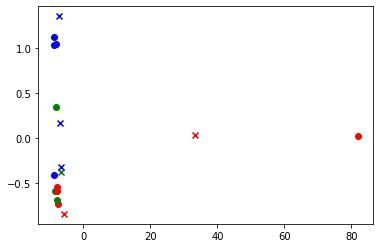

In [33]:
# Visualize test set results

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# preparing colors for each label
colors = {
            'A': 'red',
            'B': 'green',
            'C': 'blue'
         }

# plotting train data
visualized_train = pd.DataFrame(data=pca.fit_transform(x_train_2), columns=['x', 'y'])
train_x_axis = visualized_train['x']
train_y_axis = visualized_train['y']
train_result = y_train_2

for i in range(0, len(train_x_axis)):
  plt.scatter(train_x_axis[i], train_y_axis[i], color=colors[train_result[i]], marker='o')

# plotting test data
visualized_test = pd.DataFrame(data=pca.fit_transform(x_test), columns=['x', 'y'])
test_x_axis = visualized_test['x']
test_y_axis = visualized_test['y']
test_result = y_test_pred

for i in range(0, len(test_x_axis)):
  plt.scatter(test_x_axis[i], test_y_axis[i], color=colors[test_result[i]], marker='x')

# o is train data
# x is test data